In [1]:
#open and read world_happiness_2015.csv
import pandas as pd
df = pd.read_csv('../data/World_Happiness_2015.csv')
#display the first 5 rows of the dataframe
df.head()
#display the last 5 rows of the dataframe
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [2]:
#display info and describe the dataframe
df.info()
print('------------')
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

(158, 12)

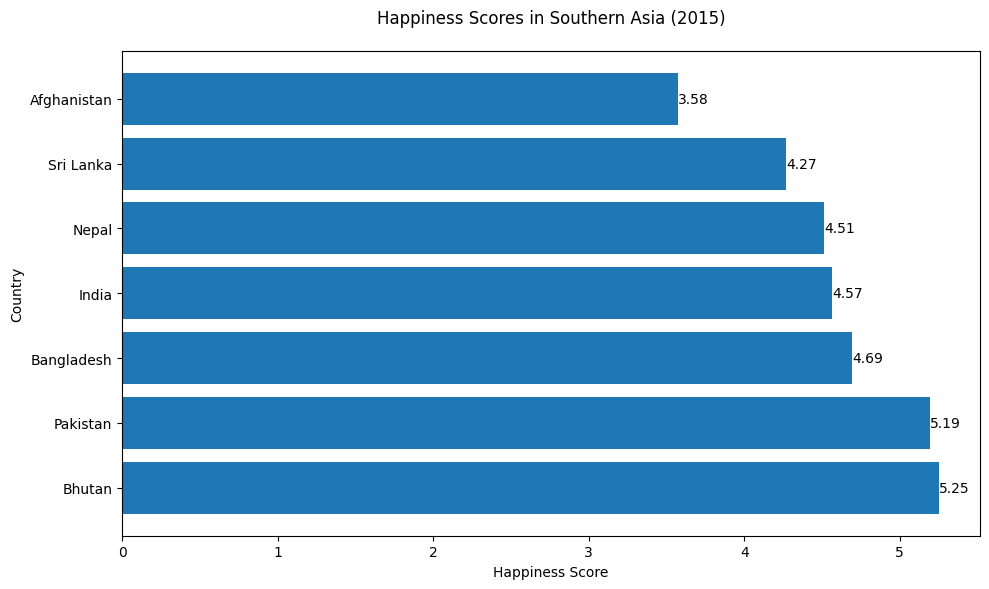

In [3]:
# Filter for Southern Asia countries and create horizontal bar plot
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Southern Asia data
southern_asia = df[df['Region'] == 'Southern Asia']

# Create the plot
plt.figure(figsize=(10, 6))

# Create horizontal bar plot
bars = plt.barh(southern_asia['Country'], southern_asia['Happiness Score'])

# Customize the plot
plt.title('Happiness Scores in Southern Asia (2015)', pad=20)
plt.xlabel('Happiness Score')
plt.ylabel('Country')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', 
            ha='left', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

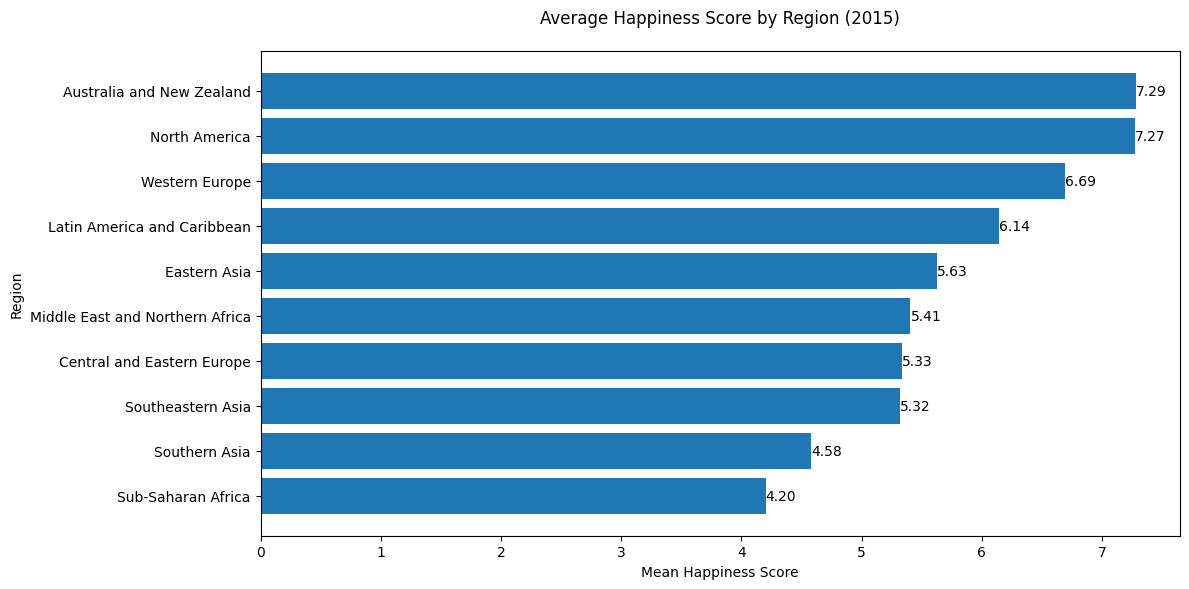

In [4]:
# Calculate mean happiness score by region
regional_means = df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=True)

# Create the visualization
plt.figure(figsize=(12, 6))

# Create horizontal bar plot of regional means
bars = plt.barh(regional_means.index, regional_means.values)

# Customize the plot
plt.title('Average Happiness Score by Region (2015)', pad=20)
plt.xlabel('Mean Happiness Score')
plt.ylabel('Region')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', 
            ha='left', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [5]:
# Calculate number of countries per region
countries_per_region = df.groupby('Region')['Country'].count().sort_values(ascending=False)

# Display the results in a more readable format
print("Number of Countries in Each Region:")
print("-" * 40)
for region, count in countries_per_region.items():
    print(f"{region}: {count} countries")

print("\nTotal number of regions:", len(countries_per_region))
print("Total number of countries:", len(df))

Number of Countries in Each Region:
----------------------------------------
Sub-Saharan Africa: 40 countries
Central and Eastern Europe: 29 countries
Latin America and Caribbean: 22 countries
Western Europe: 21 countries
Middle East and Northern Africa: 20 countries
Southeastern Asia: 9 countries
Southern Asia: 7 countries
Eastern Asia: 6 countries
Australia and New Zealand: 2 countries
North America: 2 countries

Total number of regions: 10
Total number of countries: 158


In [6]:
# Create a DataFrame with the count of countries per region
region_summary = pd.DataFrame({
    'Number of Countries': df.groupby('Region')['Country'].count()
}).sort_values('Number of Countries', ascending=False)

# Add a row with totals
region_summary.loc['TOTAL'] = region_summary['Number of Countries'].sum()

# Style the table for better visualization
styled_table = region_summary.style\
    .set_caption('Countries per Region')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left'), ('background-color', '#f2f2f2')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
    ])\
    .set_properties(**{'border': '1px solid black', 'padding': '5px'})\
    .highlight_max(color='#e6ffe6')\
    .format({'Number of Countries': '{:,.0f}'})

# Display the styled table
display(styled_table)

,Number of Countries
Region,
Sub-Saharan Africa,40
Central and Eastern Europe,29
Latin America and Caribbean,22
Western Europe,21
Middle East and Northern Africa,20
Southeastern Asia,9
Southern Asia,7
Eastern Asia,6
Australia and New Zealand,2


In [7]:
# Select numerical columns (excluding 'Standard Error' as it's not a metric)
numerical_columns = ['Happiness Score', 'Economy (GDP per Capita)', 'Family', 
                    'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
                    'Generosity', 'Dystopia Residual']

# Calculate means for each region
regional_means = df.groupby('Region')[numerical_columns].mean()

# Round the values to 3 decimal places for better readability
regional_means = regional_means.round(3)

# Sort by Happiness Score
regional_means = regional_means.sort_values('Happiness Score', ascending=False)

# Style the table for better visualization
styled_table = regional_means.style\
    .set_caption('Regional Averages of Happiness Factors')\
    .set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]},
        {'selector': 'th', 'props': [('text-align', 'left'), ('background-color', '#f2f2f2')]},
        {'selector': 'td', 'props': [('text-align', 'center')]},
    ])\
    .set_properties(**{
        'border': '1px solid black',
        'padding': '5px'
    })\
    .background_gradient(cmap='YlOrRd', subset=['Happiness Score'])\
    .format('{:.3f}')

# Display the styled table
display(styled_table)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285,1.292,1.314,0.920,0.645,0.393,0.455,2.265
North America,7.273,1.360,1.285,0.884,0.590,0.244,0.430,2.481
Western Europe,6.690,1.299,1.247,0.909,0.550,0.231,0.302,2.151
Latin America and Caribbean,6.145,0.877,1.105,0.704,0.502,0.117,0.218,2.623
Eastern Asia,5.626,1.152,1.099,0.877,0.462,0.128,0.226,1.682
Middle East and Northern Africa,5.407,1.067,0.920,0.706,0.362,0.182,0.190,1.980
Central and Eastern Europe,5.333,0.942,1.053,0.719,0.358,0.087,0.152,2.021
Southeastern Asia,5.317,0.789,0.940,0.677,0.557,0.151,0.419,1.783
Southern Asia,4.581,0.560,0.645,0.541,0.373,0.103,0.341,2.017


In [8]:
#group by region
df.groupby('Region')[['Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']].describe()

Happiness Score                             \
                                          count      mean       std    min   
Region                                                                       
Australia and New Zealand                   2.0  7.285000  0.001414  7.284   
Central and Eastern Europe                 29.0  5.332931  0.570446  4.218   
Eastern Asia                                6.0  5.626167  0.554053  4.874   
Latin America and Caribbean                22.0  6.144682  0.728560  4.518   
Middle East and Northern Africa            20.0  5.406900  1.101382  3.006   
North America                               2.0  7.273000  0.217789  7.119   
Southeastern Asia                           9.0  5.317444  0.950020  3.819   
Southern Asia                               7.0  4.580857  0.570526  3.575   
Sub-Saharan Africa                         40.0  4.202800  0.609557  2.839   
Western Europe                             21.0  6.689619  0.824582  4.857   

                                                                 \
                                     25%    50%      75%    max   
Region                                                            
Australia and New Zealand        7.28450  7.285  7.28550  7.286   
Central and Eastern Europe       4.95900  5.286  5.81300  6.505   
Eastern Asia                     5.22350  5.729  5.98625  6.298   
Latin America and Caribbean      5.84050  6.149  6.64600  7.226   
Middle East and Northern Africa  4.70775  5.262  6.32400  7.278   
North America                    7.19600  7.273  7.35000  7.427   
Southeastern Asia                4.87600  5.360  5.77000  6.798   
Southern Asia                    4.39250  4.565  4.94400  5.253   
Sub-Saharan Africa               3.75600  4.272  4.58075  5.477   
Western Europe                   6.30200  6.937  7.37800  7.587   

                                Economy (GDP per Capita)            ...  \
                                                   count      mean  ...   
Region                                                              ...   
Australia and New Zealand                            2.0  1.291880  ...   
Central and Eastern Europe                          29.0  0.942438  ...   
Eastern Asia                                         6.0  1.151780  ...   
Latin America and Caribbean                         22.0  0.876815  ...   
Middle East and Northern Africa                     20.0  1.066973  ...   
North America                                        2.0  1.360400  ...   
Southeastern Asia                                    9.0  0.789054  ...   
Southern Asia                                        7.0  0.560486  ...   
Sub-Saharan Africa                                  40.0  0.380473  ...   
Western Europe                                      21.0  1.298596  ...   

                                Generosity          Dystopia Residual  \
                                       75%      max             count   
Region                                                                  
Australia and New Zealand         0.465162  0.47501               2.0   
Central and Eastern Europe        0.209510  0.30030              29.0   
Eastern Asia                      0.312665  0.39478               6.0   
Latin America and Caribbean       0.269910  0.46187              22.0   
Middle East and Northern Africa   0.229975  0.47179              20.0   
North America                     0.443845  0.45811               2.0   
Southeastern Asia                 0.515350  0.79588               9.0   
Southern Asia                     0.386690  0.47998               7.0   
Sub-Saharan Africa                0.243342  0.50318              40.0   
Western Europe                    0.362620  0.51912              21.0   

                                                                        \
                                     mean       std      min       25%   
Region                                                                 

In [9]:
#group happiness2015 by region and calculated the mean of each region for each numeric column
df.groupby('Region')[numerical_columns].mean()


,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,
Australia and New Zealand,7.285000,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,5.332931,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,5.626167,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,6.144682,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,5.406900,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,7.273000,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,5.317444,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,4.580857,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,4.202800,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


In [10]:
#Select only the Happiness Score column from grouped. Assign the result to happy_grouped
happy_grouped = df.groupby('Region')['Happiness Score'].mean()
print(happy_grouped)

#Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean
happy_mean = happy_grouped.mean()
print(happy_mean)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64
5.785940015425187


                                     mean    max
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587
Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western E

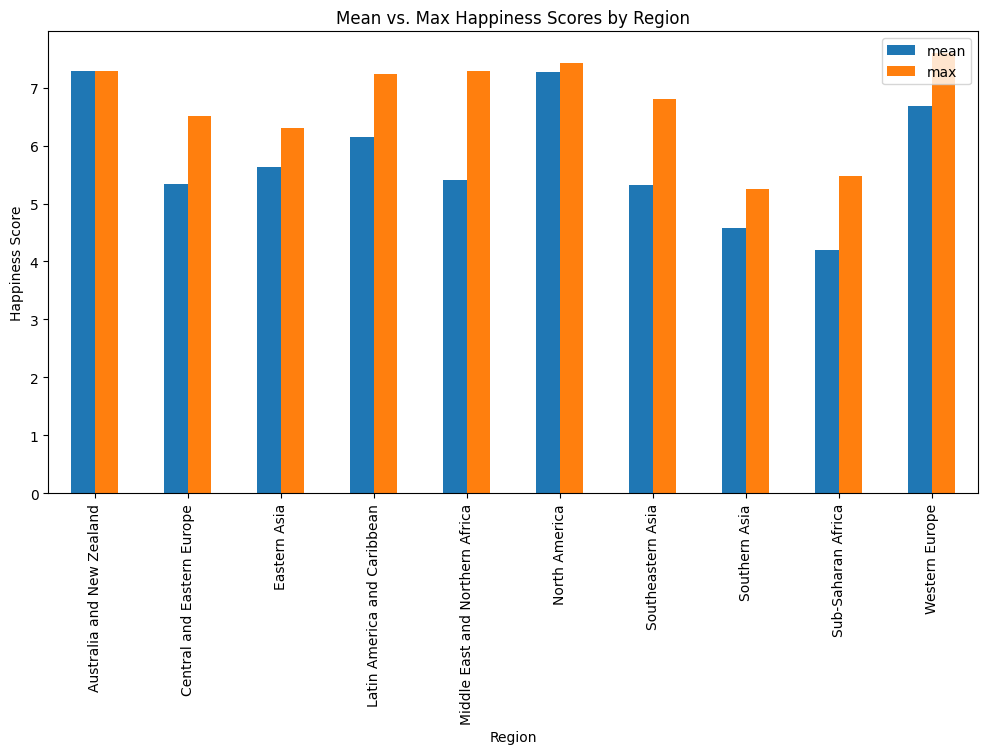

In [11]:
#calculate both the mean and the maximum happiness score for each region
happy_grouped = df.groupby('Region')['Happiness Score'].agg(['mean', 'max'])
print(happy_grouped)

#add a new column to the DataFrame called "diff" that contains the difference between the mean and maximum happiness scores. Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif
mean_max_dif = df.groupby('Region')['Happiness Score'].agg(lambda x: x.max() - x.mean())
print(mean_max_dif)

#create an optimized graph to see these above results
df.groupby('Region')['Happiness Score'].agg(['mean', 'max']).plot(kind='bar', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.title('Mean vs. Max Happiness Scores by Region')
plt.show()  



Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


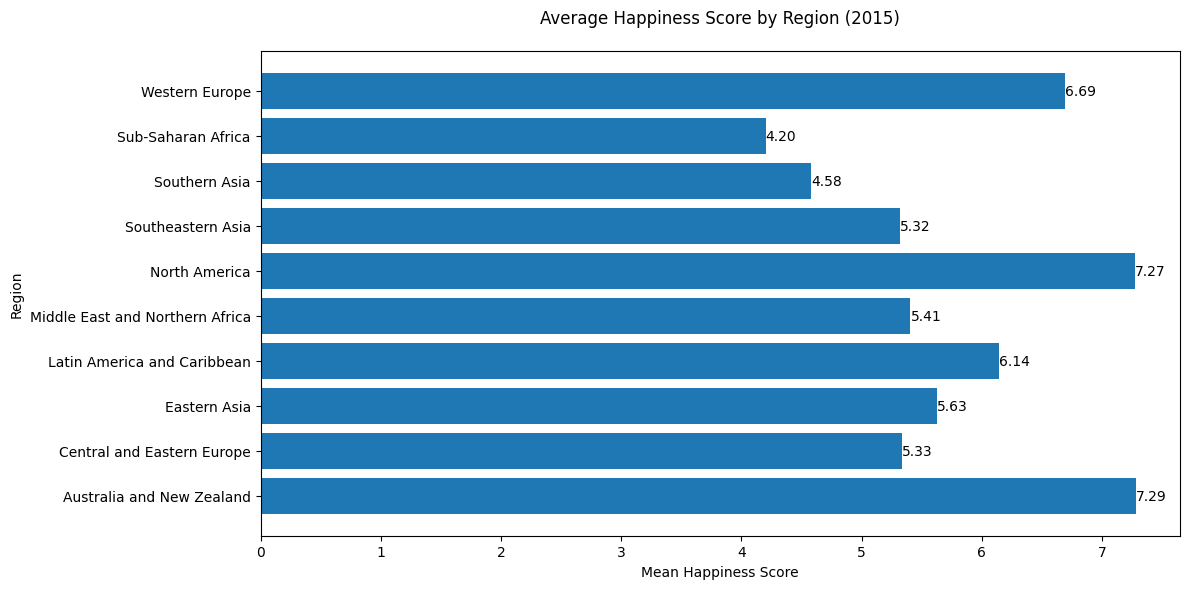

In [12]:
happiness_means = df.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

#create an orizontal bar plot of regional means
plt.figure(figsize=(12, 6))
bars = plt.barh(happiness_means.index, happiness_means.values)
plt.title('Average Happiness Score by Region (2015)', pad=20)
plt.xlabel('Mean Happiness Score')
plt.ylabel('Region')
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}', 
            ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

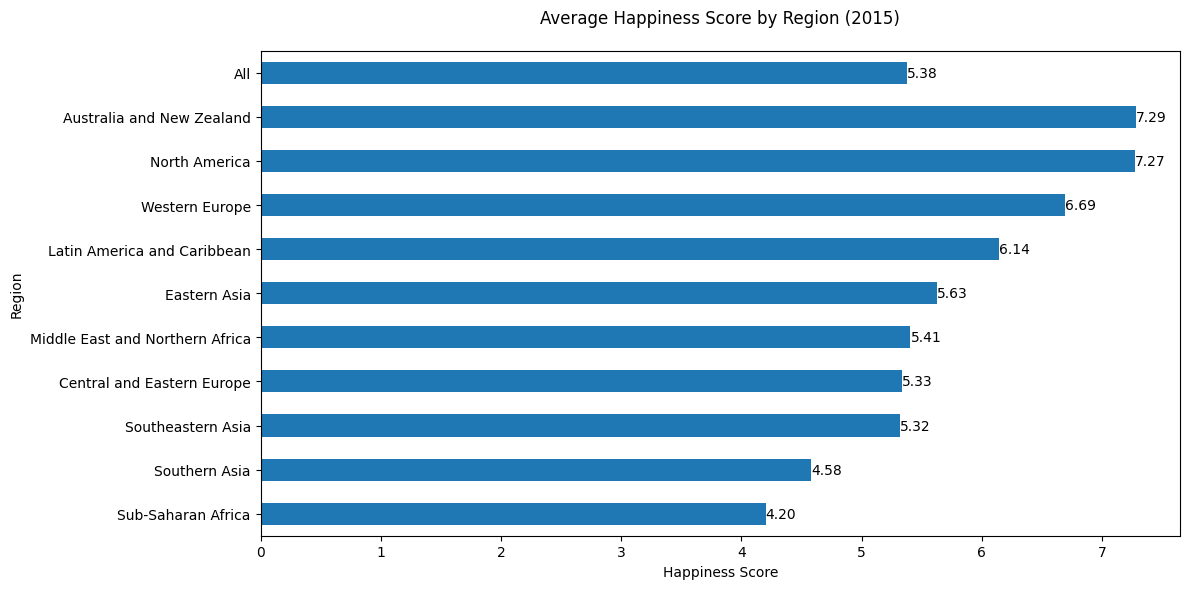

In [13]:
# Calculate mean happiness score by region
regional_means = df.groupby('Region')['Happiness Score'].mean()

# Calculate overall mean
overall_mean = df['Happiness Score'].mean()

# Create a new Series with regional means and overall mean
means_data = pd.concat([
    regional_means,
    pd.Series({'All': overall_mean})
])

# Sort values but keep 'All' at the end
means_sorted = pd.concat([
    means_data[means_data.index != 'All'].sort_values(ascending=True),
    means_data[means_data.index == 'All']
])

# Create the plot
plt.figure(figsize=(12, 6))
ax = means_sorted.plot(kind='barh')

# Customize the plot
plt.title('Average Happiness Score by Region (2015)', pad=20)
plt.xlabel('Happiness Score')
plt.ylabel('Region')

# Add value labels on the bars
for i, v in enumerate(means_sorted):
    ax.text(v, i, f'{v:.2f}', va='center')

plt.tight_layout()
plt.show()

In [14]:
#Calculate the mean of the Happiness Score column in the original happiness 2015 data set. Assign the result to world_mean_happiness
world_mean_happiness = df['Happiness Score'].mean()
print(world_mean_happiness)

5.375734177215189


In [15]:
# Calculate min, max, and mean for Family and Happiness Score by region
stats_by_region = df.groupby('Region').agg({
    'Family': ['min', 'max', 'mean'],
    'Happiness Score': ['min', 'max', 'mean']
}).round(3)

# Rename columns for better readability
stats_by_region.columns = [
    'Family_Min', 'Family_Max', 'Family_Mean',
    'Happiness_Min', 'Happiness_Max', 'Happiness_Mean'
]

# Sort by mean happiness score
stats_by_region = stats_by_region.sort_values('Happiness_Mean', ascending=False)

# Display with better formatting
pd.set_option('display.max_columns', None)
display(stats_by_region.style.set_caption('Regional Statistics: Family and Happiness Scores'))

,Family_Min,Family_Max,Family_Mean,Happiness_Min,Happiness_Max,Happiness_Mean
Region,,,,,,
Australia and New Zealand,1.309000,1.320000,1.314000,7.284000,7.286000,7.285000
North America,1.247000,1.323000,1.285000,7.119000,7.427000,7.273000
Western Europe,0.893000,1.402000,1.247000,4.857000,7.587000,6.690000
Latin America and Caribbean,0.743000,1.305000,1.105000,4.518000,7.226000,6.145000
Eastern Asia,0.947000,1.301000,1.099000,4.874000,6.298000,5.626000
Middle East and Northern Africa,0.475000,1.224000,0.920000,3.006000,7.278000,5.407000
Central and Eastern Europe,0.386000,1.340000,1.053000,4.218000,6.505000,5.333000
Southeastern Asia,0.627000,1.265000,0.940000,3.819000,6.798000,5.317000
Southern Asia,0.303000,1.104000,0.645000,3.575000,5.253000,4.581000


In [16]:
# Create pivot table
pivot_stats = pd.pivot_table(df, 
                           values=['Happiness Score', 'Family'],
                           index=['Region'],
                           aggfunc=['min', 'max', 'mean'],
                           margins=True,
                           margins_name='All').round(3)

# Reorder the columns to group Happiness Score and Family statistics
column_order = [
    ('min', 'Happiness Score'),
    ('max', 'Happiness Score'),
    ('mean', 'Happiness Score'),
    ('min', 'Family'),
    ('max', 'Family'),
    ('mean', 'Family')
]

pivot_stats = pivot_stats[column_order]

# Sort by mean happiness score (excluding 'All' row)
pivot_stats = pd.concat([
    pivot_stats.iloc[:-1].sort_values(('mean', 'Happiness Score'), ascending=False),
    pivot_stats.iloc[-1:] # Keep 'All' row at the bottom
])

# Rename columns for better readability
pivot_stats.columns = [
    'Happiness Min', 'Happiness Max', 'Happiness Mean',
    'Family Min', 'Family Max', 'Family Mean'
]

# Display with better formatting
pd.set_option('display.max_columns', None)
display(pivot_stats.style.set_caption('Regional Statistics: Happiness Score and Family'))

,Happiness Min,Happiness Max,Happiness Mean,Family Min,Family Max,Family Mean
Region,,,,,,
Australia and New Zealand,7.284000,7.286000,7.285000,1.309000,1.320000,1.314000
North America,7.119000,7.427000,7.273000,1.247000,1.323000,1.285000
Western Europe,4.857000,7.587000,6.690000,0.893000,1.402000,1.247000
Latin America and Caribbean,4.518000,7.226000,6.145000,0.743000,1.305000,1.105000
Eastern Asia,4.874000,6.298000,5.626000,0.947000,1.301000,1.099000
Middle East and Northern Africa,3.006000,7.278000,5.407000,0.475000,1.224000,0.920000
Central and Eastern Europe,4.218000,6.505000,5.333000,0.386000,1.340000,1.053000
Southeastern Asia,3.819000,6.798000,5.317000,0.627000,1.265000,0.940000
Southern Asia,3.575000,5.253000,4.581000,0.303000,1.104000,0.645000
